# Pandas: Trabalhando com tabelas e dados

# Ver de refazer usando https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/01-Pandas-Basics-Part1.html

O pacote `pandas` é uma das ferramentas mais essenciais de *Python* para cientistas e analistas de dados atualmente. Ele serve como a base para grande parte dos projetos que envolvem a leitura, manipulação, limpeza e escrita de dados. O nome `pandas` vem do termo *panel data* (dados em painel), utilizado na econometria para se referir a dados que contêm múltiplas observações ao longo do tempo para os mesmos indivíduos.

Os dois principais objetos do `pandas` são as séries (`Series`) e as tabelas (`DataFrame`).

- Uma `Series` pode ser vista como uma única coluna

- Um `DataFrame` é uma tabela multidimensional composta por várias `Series`.

In [2]:
import numpy as np
import pandas as pd

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
# O valor `NaN` (*not a number*) representa uma posição nula.

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

A lista foi passada para o construtor `pd.Series`, e o `pandas` automaticamente criou um índice numérico para cada linha, além de determinar o tipo de dado mais adequado para os valores (neste caso, `float64`) mesmo que todos os valores fornecidos eram inteiros, exceto o `NaN`, que é tratado como `float64`. 

O `pandas` gera um índice numérico para cada linha e atribui automaticamente números como títulos para cada coluna até mesmo para `DataFrames`.

A criação de `DataFrames` também é bastante simples, mas ao mesmo tempo muito flexível. 

Vamos criamos um `DataFrame` a partir de uma matriz de inteiros.


In [206]:
pd.DataFrame(np.arange(12).reshape(4, 3))

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


Podemos passar mais informações ao *DataFrame*, como um nome para cada coluna:

In [4]:
pd.DataFrame(
    np.arange(12).reshape(4, 3),
    columns=['Sim', 'Não', 'Talvez']
)

,Sim,Não,Talvez
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


Também é possível criar um índice personalizado para cada linha. Por exemplo, podemos gerar um índice utilizando um intervalo de datas:

In [7]:
dates = pd.date_range(
    '20250101', periods=4
)  # experimente trocar a string da data por 'today'

pd.DataFrame(
    np.arange(12).reshape(4, 3),
    index=dates,
    columns=['Sim', 'Não', 'Talvez']
)

,Sim,Não,Talvez
2025-01-01,0,1,2
2025-01-02,3,4,5
2025-01-03,6,7,8
2025-01-04,9,10,11


Poderiamos trocar a string a data `'20250101'` pela string `'today'`

In [8]:
dates = pd.date_range(
    'today', periods=4
)  

pd.DataFrame(
    np.arange(12).reshape(4, 3),
    index=dates,
    columns=['Sim', 'Não', 'Talvez']
)

,Sim,Não,Talvez
2025-02-13 08:06:31.911316,0,1,2
2025-02-14 08:06:31.911316,3,4,5
2025-02-15 08:06:31.911316,6,7,8
2025-02-16 08:06:31.911316,9,10,11


Observe que `'today'` também retorna a hora de executação do código

Para retornar apenas o dia (sem a hora) ao usar o `pd.date_range()`, você pode usar a função `.normalize()` que ajusta a data para a meia-noite, ou formatar as datas conforme necessário. Aqui está como você pode fazer isso:

In [11]:
# Criando um intervalo de datas com a data de hoje
dates = pd.date_range('today', periods=4)

# Usando normalize() para ajustar para a meia-noite (remover o horário)
dates_normalized = dates.normalize()

# Exibindo as datas
print(dates_normalized)

#Exibindo dataframe
pd.DataFrame(
    np.arange(12).reshape(4, 3),
    index=dates_normalized,
    columns=['Sim', 'Não', 'Talvez']
)

DatetimeIndex(['2025-02-13', '2025-02-14', '2025-02-15', '2025-02-16'], dtype='datetime64[ns]', freq='D')


,Sim,Não,Talvez
2025-02-13,0,1,2
2025-02-14,3,4,5
2025-02-15,6,7,8
2025-02-16,9,10,11


Podemos também criar uma *DataFrame* passando um dicionário com objetos que podem ser convertidos a objetos do tipo *Series*.

In [3]:
df = pd.DataFrame({
    'A': 1., # Todos os valores serão 1.0, pois é um único valor escalar
    'B': pd.Timestamp('20250102'), # Um valor único de timestamp (data e hora)
    'C': pd.Series(1, index=list(range(4)), dtype='float32'), # Série de 4 valores iguais a 1.0, tipo float32
    'D': np.array([3] * 4, dtype='int32'), # Um array de 4 valores iguais a 3 (tipo int32)
    'E': pd.Categorical(["test", "train", "test", "train"]), # Coluna com categorias 'test' e 'train'
    'F': list('abcd') # Lista de caracteres 'a', 'b', 'c', 'd'
})

df

,A,B,C,D,E,F
0,1.0,2025-01-02,1.0,3,test,a
1,1.0,2025-01-02,1.0,3,train,b
2,1.0,2025-01-02,1.0,3,test,c
3,1.0,2025-01-02,1.0,3,train,d


```{note}
Quando você usa `pd.Categorical()`, você está dizendo ao pandas que os dados que você está fornecendo são categóricos. Ou seja, "test" e "train" são considerados como categorias e não como simples strings. A principal vantagem é que economização de memória, já que pandas não precisa armazenar os valores repetidos (as varias strings são armazenada de forma separada), mas sim os índices dessas categorias (armazenadas na memoria apenas uma vez).
```

Observe que as colunas resultantes possuem tipos diferentes:

In [210]:
df.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Acessando os dados

Existem várias maneiras de acessar os dados em um `DataFrame` usando o pacote. 

### Selecionando Colunas

Para acessar uma coluna específica, que será retornada como uma `Series`, podemos utilizar tanto a notação de colchetes quanto a de atributo:

In [ ]:
df['E']

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): ['test', 'train']

In [ ]:
df.E

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): ['test', 'train']

Tecnicamente, uma única coluna em um DataFrame é um objeto Series.

In [4]:
type(df['E'])

pandas.core.series.Series

Um objeto Series é exibido de forma diferente de um objeto DataFrame. Para selecionar uma coluna como um DataFrame e não como um objeto Series, usaremos dois colchetes.

In [5]:
df[['E']]

,E
0,test
1,train
2,test
3,train


In [6]:
type(df[['E']])

pandas.core.frame.DataFrame

Ao usar dois colchetes, também podemos selecionar várias colunas ao mesmo tempo.

In [7]:
df[['D','E','F']]

,D,E,F
0,3,test,a
1,3,train,b
2,3,test,c
3,3,train,d


### Fatiando um Dataframe

Podemos fatiar o dataframe usamos `:`, onde iremos selecionar quais linhas iremos pegar

In [ ]:
df[0:3]

,A,B,C,D,E,F
0,1.0,2025-01-02,1.0,3,test,a
1,1.0,2025-01-02,1.0,3,train,b
2,1.0,2025-01-02,1.0,3,test,c


Para visualizar as primeiras linhas de dados, podemos utilizar o método `head`.

O argumento do método `head()` é um número inteiro, que especifica a quantidade de linha que o método retornará.

In [20]:
df2 = pd.DataFrame(
    np.arange(100).reshape(20, 5),
    columns=list('ABCDE')
)

df2.head(2)

,A,B,C,D,E
0,0,1,2,3,4
1,5,6,7,8,9


### Exibindo Primeiras e Últimas Linhas

Por padrão, `head()` retorna as primeiras 5 linhas se nenhum argumento for passado. 

In [21]:
df2.head()

,A,B,C,D,E
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


De forma similar, podemos acessar as últimas linhas da *DataFrame*, utilizando o método `tail`.

O argumento do método `tail()` é um número inteiro que especifica quantas linhas você quer visualizar do final da estrutura. Por padrão, `tail()` retorna as últimas 5 linhas se nenhum argumento for passado. Se você passar um número inteiro, ele retornará exatamente o número de linhas especificado.

In [22]:
df2.tail()

,A,B,C,D,E
15,75,76,77,78,79
16,80,81,82,83,84
17,85,86,87,88,89
18,90,91,92,93,94
19,95,96,97,98,99


In [23]:
df2.tail(3)

,A,B,C,D,E
17,85,86,87,88,89
18,90,91,92,93,94
19,95,96,97,98,99


### Verificando números de Linhas e Colunas

Para listar o índice e as colunas usamos `.index` e `.columns`, respectivamente:

In [24]:
df2.index

RangeIndex(start=0, stop=20, step=1)

In [25]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

Para verificar o formato da tabela, usa-se o atributo `shape`:

In [26]:
df2.shape

(20, 5)

### Convertendo para Numpy

O método `to_numpy` converte os dados para uma representação no formato de um array do NumPy.

In [27]:
df2.to_numpy()

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54],
       [55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64],
       [65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74],
       [75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84],
       [85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94],
       [95, 96, 97, 98, 99]])

### Transpondo um DataFrame

Para realizar a transposição de um `DataFrame`, é só acessar o atributo `T`:

In [28]:
df2.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
A,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
B,1,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96
C,2,7,12,17,22,27,32,37,42,47,52,57,62,67,72,77,82,87,92,97
D,3,8,13,18,23,28,33,38,43,48,53,58,63,68,73,78,83,88,93,98
E,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,94,99


### Função loc

Para acessar linhas com base nos seus índices (labels), podemos utilizar o atributo `loc`:

In [39]:
dates = pd.date_range(
    '20200101', periods=5
)

df3 = pd.DataFrame(
    np.arange(15).reshape(5, 3),
    index=dates,
    columns=['A', 'B', 'C']
)

print(df3)

df3.loc[dates[0]]

             A   B   C
2020-01-01   0   1   2
2020-01-02   3   4   5
2020-01-03   6   7   8
2020-01-04   9  10  11
2020-01-05  12  13  14


A    0
B    1
C    2
Name: 2020-01-01 00:00:00, dtype: int32

O atributo `loc` também possibilita o acesso a listas de índices (labels), além de permitir a especificação das colunas que devem ser retornadas:


In [40]:
df3.loc[[dates[2], dates[4]]]

,A,B,C
2020-01-03,6,7,8
2020-01-05,12,13,14


In [225]:
df3.loc[[dates[2], dates[4]], ['A', 'C']]

,A,C
2020-01-03,6,8
2020-01-05,12,14


Caso seja especificado apenas um índice e uma coluna, o `pandas` retornará o valor correspondente na tabela:

In [226]:
df3.loc[df3.index[0], 'B']

1

Observe a diferença no comportamento quando a única coluna é fornecida dentro de uma lista:

In [227]:
df3.loc[df3.index[0], ['B']]  # retorna uma Series com apenas um elemento

B    1
Name: 2020-01-01 00:00:00, dtype: int64

Para acessar um único valor de maneira mais eficiente, o atributo `loc` pode ser substituído por `at`:

In [228]:
df3.at[df3.index[0], 'B']

1

De forma semelhante ao `loc`, o atributo `iloc` também possibilita o acesso aos dados de um `DataFrame`, mas, em vez de utilizar os valores dos índices, ele permite acessar as linhas com base nas suas posições. Exemplo:

In [229]:
df3.iloc[0]  # equivale a df3.loc[df3.index[0]]

A    0
B    1
C    2
Name: 2020-01-01 00:00:00, dtype: int64

As colunas também são tratadas de forma numérica pelo `iloc`. Além disso, é possível utilizá-lo para acessar fatias da tabela, assim como em um array do `NumPy`:

In [230]:
df3.iloc[0, [0, 2]]

A    0
C    2
Name: 2020-01-01 00:00:00, dtype: int64

In [231]:
df3.iloc[0, 0]

0

In [232]:
df3.iloc[0:2, 0:2]  # exclui o final

,A,B
2020-01-01,0,1
2020-01-02,3,4


### Filtrando dados com expressões booleanas

Continuando as similaridades com *arrays*, também é possível acessar os dados de uma *DataFrame* usando condições booleanas:

In [44]:
df2 = pd.DataFrame(
    np.arange(100).reshape(20, 5),
    columns=list('ABCDE')
)

In [45]:
df2[df2.A % 2 == 0]  # apenas as linhas em que a coluna A é par

,A,B,C,D,E
0,0,1,2,3,4
2,10,11,12,13,14
4,20,21,22,23,24
6,30,31,32,33,34
8,40,41,42,43,44
10,50,51,52,53,54
12,60,61,62,63,64
14,70,71,72,73,74
16,80,81,82,83,84
18,90,91,92,93,94


In [46]:
df2[df2 % 2 == 0]  # Apenas os valores pares

,A,B,C,D,E
0,0.0,NaN,2.0,NaN,4.0
1,NaN,6.0,NaN,8.0,NaN
2,10.0,NaN,12.0,NaN,14.0
3,NaN,16.0,NaN,18.0,NaN
4,20.0,NaN,22.0,NaN,24.0
5,NaN,26.0,NaN,28.0,NaN
6,30.0,NaN,32.0,NaN,34.0
7,NaN,36.0,NaN,38.0,NaN
8,40.0,NaN,42.0,NaN,44.0
9,NaN,46.0,NaN,48.0,NaN


### Filtrando dados com isin

O método *isin* permite filtrar dados:

In [235]:
df = pd.DataFrame({
    'A': 1., # Todos os valores serão 1.0, pois é um único valor escalar
    'B': pd.Timestamp('20250102'), # Um valor único de timestamp (data e hora)
    'C': pd.Series(1, index=list(range(4)), dtype='float32'), # Série de 4 valores iguais a 1.0, tipo float32
    'D': np.array([3] * 4, dtype='int32'), # Um array de 4 valores iguais a 3 (tipo int32)
    'E': pd.Categorical(["test", "train", "test", "train"]), # Coluna com categorias 'test' e 'train'
    'F': list('abcd') # Lista de caracteres 'a', 'b', 'c', 'd'
})

df[df['F'].isin(['a', 'd'])]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,a
3,1.0,2013-01-02,1.0,3,train,d


Além de acessar dados, *loc*, *iloc*, *at* e *iat* permitem atribuir valores às posições indicadas:

In [54]:
dates = pd.date_range(
    '20200101', periods=5
)

df3 = pd.DataFrame(
    np.arange(15).reshape(5, 3),
    index=dates,
    columns=['A', 'B', 'C']
)

print(df3)

df3.iloc[2] = 1

df3

             A   B   C
2020-01-01   0   1   2
2020-01-02   3   4   5
2020-01-03   6   7   8
2020-01-04   9  10  11
2020-01-05  12  13  14


,A,B,C
2020-01-01,0,1,2
2020-01-02,3,4,5
2020-01-03,1,1,1
2020-01-04,9,10,11
2020-01-05,12,13,14


In [55]:
df3.loc['20200101', 'C'] = 10

df3

,A,B,C
2020-01-01,0,1,10
2020-01-02,3,4,5
2020-01-03,1,1,1
2020-01-04,9,10,11
2020-01-05,12,13,14


In [56]:
df3.iat[2, 2] = -5

df3

,A,B,C
2020-01-01,0,1,10
2020-01-02,3,4,5
2020-01-03,1,1,-5
2020-01-04,9,10,11
2020-01-05,12,13,14


Também é possível usar máscaras booleanas para atribuir valores:

In [57]:
df2 = pd.DataFrame(
    np.arange(100).reshape(20, 5),
    columns=list('ABCDE')
)

In [58]:
df2[df2 % 2 == 0] = -df2

df2

,A,B,C,D,E
0,0,1,-2,3,-4
1,5,-6,7,-8,9
2,-10,11,-12,13,-14
3,15,-16,17,-18,19
4,-20,21,-22,23,-24
5,25,-26,27,-28,29
6,-30,31,-32,33,-34
7,35,-36,37,-38,39
8,-40,41,-42,43,-44
9,45,-46,47,-48,49


Para adicionar uma nova coluna, basta usar a notação de colchetes com o nome da nova coluna:

In [43]:
df2['F'] = 1

df2

,A,B,C,D,E,F
0,0,1,-2,3,-4,1
1,5,-6,7,-8,9,1
2,-10,11,-12,13,-14,1
3,15,-16,17,-18,19,1
4,-20,21,-22,23,-24,1
5,25,-26,27,-28,29,1
6,-30,31,-32,33,-34,1
7,35,-36,37,-38,39,1
8,-40,41,-42,43,-44,1
9,45,-46,47,-48,49,1


## Estatística descritiva

O pacote `pandas` disponibiliza diversas funções para análise estatística descritiva. A principal entre elas é o método `describe`, que calcula uma série de medidas:

In [60]:
df2 = pd.DataFrame(
    np.arange(100).reshape(20, 5),
    columns=list('ABCDE')
)

In [63]:
df2.describe()

,A,B,C,D,E
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,47.500000,48.500000,49.500000,50.500000,51.500000
std,29.580399,29.580399,29.580399,29.580399,29.580399
min,0.000000,1.000000,2.000000,3.000000,4.000000
25%,23.750000,24.750000,25.750000,26.750000,27.750000
50%,47.500000,48.500000,49.500000,50.500000,51.500000
75%,71.250000,72.250000,73.250000,74.250000,75.250000
max,95.000000,96.000000,97.000000,98.000000,99.000000


É possível selecionar os percentis a serem incluídos na análise (a mediana é sempre retornada por padrão):

In [64]:
df2.describe(percentiles=[.05, .25, .75, .95])

,A,B,C,D,E
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,47.500000,48.500000,49.500000,50.500000,51.500000
std,29.580399,29.580399,29.580399,29.580399,29.580399
min,0.000000,1.000000,2.000000,3.000000,4.000000
5%,4.750000,5.750000,6.750000,7.750000,8.750000
25%,23.750000,24.750000,25.750000,26.750000,27.750000
50%,47.500000,48.500000,49.500000,50.500000,51.500000
75%,71.250000,72.250000,73.250000,74.250000,75.250000
95%,90.250000,91.250000,92.250000,93.250000,94.250000
max,95.000000,96.000000,97.000000,98.000000,99.000000


Para colunas não-númericas, *describe* retorna um sumário mais simples:

In [66]:
df = pd.DataFrame({
    'A': 1., # Todos os valores serão 1.0, pois é um único valor escalar
    'B': pd.Timestamp('20250102'), # Um valor único de timestamp (data e hora)
    'C': pd.Series(1, index=list(range(4)), dtype='float32'), # Série de 4 valores iguais a 1.0, tipo float32
    'D': np.array([3] * 4, dtype='int32'), # Um array de 4 valores iguais a 3 (tipo int32)
    'E': pd.Categorical(["test", "train", "test", "train"]), # Coluna com categorias 'test' e 'train'
    'F': list('abcd') # Lista de caracteres 'a', 'b', 'c', 'd'
})

In [67]:
df['E'].describe()

count        4
unique       2
top       test
freq         2
Name: E, dtype: object

Numa *DataFrame* com tipos mistos, *describe* irá incluir apenas as colunas numéricas:

In [69]:
frame = pd.DataFrame({'a': ['Sim', 'Sim', 'Não', 'Não'], 
                      'b': range(4)
                    })

frame.describe()

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


Esse comportamento pode ser ajustado pelos argumentos `include` e `exclude`:

In [70]:
frame.describe(include=['object'])

,a
count,4
unique,2
top,Sim
freq,2


In [71]:
frame.describe(include=['number'])

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [72]:
frame.describe(include=['object', 'number'])

,a,b
count,4,4.000000
unique,2,NaN
top,Sim,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


In [73]:
frame.describe(include='all')

,a,b
count,4,4.000000
unique,2,NaN
top,Sim,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


Cada uma das funções separadas de estatística descritiva pode ser calculada para um dado eixo (*axis*), assim como *NumPy*:

In [74]:
df4 = pd.DataFrame({
    'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
    'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])
})

df4

,one,two,three
a,-0.155247,1.537308,NaN
b,0.680737,0.852043,1.586025
c,0.165374,-1.418294,1.900515
d,NaN,1.398593,1.582264


In [76]:
df4.mean(0)

one      0.230288
two      0.592412
three    1.689601
dtype: float64

In [77]:
df4.mean(1)

a    0.691030
b    1.039602
c    0.215865
d    1.490429
dtype: float64

Ao contrário do `NumPy`, caso o eixo não seja especificado, o valor padrão é `axis=0` (no `NumPy`, a média é calculada para todo o `array`).

In [78]:
df4.mean()

one      0.230288
two      0.592412
three    1.689601
dtype: float64

Observe que os valores `NaN` são ignorados. Esse comportamento pode ser controlado pelo argumento `skipna`, que é `True` por padrão:

In [79]:
df4.mean(0, skipna=False)

one           NaN
two      0.592412
three         NaN
dtype: float64

A tabela abaixo oferece um sumário de funções comumente usadas:


| Função        | Convenção           |
|------------- |-------------|
| *count*      | número de observações não-*NaN* |
| *sum* | soma dos valores      |
| *mean*      | média dos valores     |
| *mad* | desvio absoluto médio      |
| *median* | mediana dos valores      |
| *min* | mínimo      |
| *max* | máximo     |
| *mode* | moda      |
| *abs* | valores absolutos      |
| *prod* | produto dos valores      |
| *std* | desvio padrão amostral      |
| *var* | variância amostral      |
| *skew* | assimetria amostral      |
| *kurt* | curtose amostral    |
| *quantile* | quantis amostrais    |
| *cumsum* | soma acumulada    |
| *cumprod* | produto acumulado    |
| *cummax* | máximo acumulado    |
| *cummin* | mínimo acumulado  |

## Ordenando valores

O `pandas` oferece três maneiras de ordenar: pelos índices, pelas colunas ou por ambos. Os métodos `Series.sort_index()` e `DataFrame.sort_index()` são utilizados para ordenar objetos `pandas` com base nos seus índices:

In [83]:
df = pd.DataFrame({
     'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
     'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
     'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])
})

df

,one,two,three
a,0.387426,1.043580,NaN
b,1.008739,-1.001446,-1.603897
c,-1.446750,-0.294371,-0.496609
d,NaN,-0.123221,-0.481129


In [85]:
df.sort_index(ascending=False)

,one,two,three
d,NaN,-0.123221,-0.481129
c,-1.446750,-0.294371,-0.496609
b,1.008739,-1.001446,-1.603897
a,0.387426,1.043580,NaN


In [86]:
df.sort_index(axis=1)

,one,three,two
a,0.387426,NaN,1.043580
b,1.008739,-1.603897,-1.001446
c,-1.446750,-0.496609,-0.294371
d,NaN,-0.481129,-0.123221


In [87]:
df['three'].sort_index(ascending=False)

d   -0.481129
c   -0.496609
b   -1.603897
a         NaN
Name: three, dtype: float64

O método `Series.sort_values()` é empregado para ordenar uma `Series` conforme os seus valores. Já o método `DataFrame.sort_values()` permite ordenar um `DataFrame` com base nos valores de suas linhas ou colunas. Ele possui um parâmetro adicional chamado `by=`, que permite especificar uma ou mais colunas a serem usadas para determinar a ordem dos dados.

In [272]:
df1 = pd.DataFrame({'one': [2, 1, 1, 1],
                    'two': [1, 3, 2, 4],
                    'three': [5, 4, 3, 2]})

df1

,one,two,three
0,2,1,5
1,1,3,4
2,1,2,3
3,1,4,2


In [273]:
df1.sort_values(by='two')

,one,two,three
0,2,1,5
2,1,2,3
1,1,3,4
3,1,4,2


In [274]:
df1[['one', 'two', 'three']].sort_values(by=['one', 'two'])

,one,two,three
2,1,2,3
1,1,3,4
3,1,4,2
0,2,1,5


Esses métodos possuem um tratamento específico para valores ausentes, que é controlado pelo parâmetro `na_position`:

In [275]:
s = pd.Series(
    ['A', 'B', np.nan, 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'],
    dtype="object"
)

s.sort_values()

0       A
3    Aaba
1       B
4    Baca
6    CABA
8     cat
7     dog
2     NaN
5     NaN
dtype: object

In [276]:
s.sort_values(na_position='first')

2     NaN
5     NaN
0       A
3    Aaba
1       B
4    Baca
6    CABA
8     cat
7     dog
dtype: object

A classe `Series` também possui os métodos `nsmallest()` e `nlargest()`, que retornam os `n` menores ou maiores valores, respectivamente. 

Esses métodos podem ser muito mais eficientes do que ordenar toda a `Series` apenas para usar `tail(n)` ou `head(n)` no resultado. 

In [279]:
s = pd.Series(np.random.permutation(10))

s

0    0
1    5
2    9
3    4
4    2
5    6
6    7
7    8
8    3
9    1
dtype: int64

In [280]:
s.sort_values()

0    0
9    1
4    2
8    3
3    4
1    5
5    6
6    7
7    8
2    9
dtype: int64

In [281]:
s.nsmallest(3)

0    0
9    1
4    2
dtype: int64

In [282]:
s.nlargest(2)

2    9
7    8
dtype: int64

Da mesma forma, esses métodos estão disponíveis para `DataFrames`, sendo necessário indicar a(s) coluna(s) desejada(s).

In [283]:
df = pd.DataFrame({'a': [-2, -1, 1, 10, 8, 11, -1],
                   'b': list('abdceff'),
                   'c': [1.0, 2.0, 4.0, 3.2, np.nan, 3.0, 4.0]})
df

,a,b,c
0,-2,a,1.0
1,-1,b,2.0
2,1,d,4.0
3,10,c,3.2
4,8,e,NaN
5,11,f,3.0
6,-1,f,4.0


In [284]:
df.nlargest(3, 'a')

,a,b,c
5,11,f,3.0
3,10,c,3.2
4,8,e,NaN


In [285]:
df.nsmallest(5, ['a', 'c'])

,a,b,c
0,-2,a,1.0
1,-1,b,2.0
6,-1,f,4.0
2,1,d,4.0
4,8,e,NaN


## Combinando *Series* e *DataFrames*

O `pandas` oferece diversas maneiras de combinar objetos `Series` e `DataFrames`, utilizando lógica de conjuntos para os índices e colunas e álgebra relacional para operações do tipo `join`, semelhantes às que encontramos em bancos de dados SQL.

A função `concat` realiza a concatenação ao longo de um eixo (`axis`), empregando a lógica de conjuntos (união ou interseção) para os índices ou colunas no outro eixo, caso ele exista (`Series` possui apenas um eixo). Aqui está um exemplo:

In [89]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
 

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])


frames = [df1, df2, df3]
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


Caso você queira associar chaves específicas aos dados de cada *DataFrame* original, é possível utilizar o argumento `keys`:

In [90]:
result = pd.concat(frames, keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

O mesmo efeito pode ser obtido passando um dicionário com as *DataFrames* parciais:

In [288]:
pieces = {'x': df1, 'y': df2, 'z': df3}

result = pd.concat(pieces)

result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

O objeto gerado pela concatenação agora possui um índice múltiplo e hierárquico, o que possibilita a seleção de cada bloco original utilizando o atributo `loc`.

In [289]:
result.loc['y']

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


A função `concat` realiza uma cópia dos dados, portanto, ela não deve ser usada de maneira iterativa. Ou seja, se os dados forem gerados por um processo repetitivo, o mais adequado é armazenar as *DataFrames* parciais em uma lista e aplicar `concat` apenas uma vez.

Ao combinar várias *DataFrames*, é possível definir como lidar com os outros eixos de duas maneiras, utilizando o argumento `join`:

1. **União** dos eixos, ou seja, `join='outer'`. Esta é a opção padrão e não causa perda de informações.
2. **Interseção** dos eixos, ou seja, `join='inner'`.

Vamos primeiro observar um exemplo com `join='outer'`:

In [291]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [292]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                    index=[2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [293]:
result = pd.concat([df1, df4], axis=1, sort=False)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [294]:
result = pd.concat([df1, df4], axis=0, sort=False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [295]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [296]:
result = pd.concat([df1, df4], axis=0, join='inner')
result

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


Para *DataFrames* que não possuem índices significativos, é possível realizar a concatenação ignorando os índices originais. Isso pode ser útil, especialmente quando há índices duplicados, como no exemplo acima. Para isso, basta utilizar o argumento `ignore_index`.

In [297]:
result = pd.concat([df1, df4], axis=0, ignore_index=True, join='inner')
result

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
4,B2,D2
5,B3,D3
6,B6,D6
7,B7,D7


In [298]:
result = pd.concat([df1, df4], axis=1, ignore_index=True, join='inner')
result

,0,1,2,3,4,5,6
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


É possível concatenar uma mistura de objetos *Series* e *DataFrame*. Internamente, *pandas* transforma a(s) *Series* em *DataFrame(s)* com apenas um coluna com o(s) mesmo(s) nome(s) da(s) *Series*.

In [299]:
s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')

pd.concat([df1, s1], axis=1)

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


Caso a(s) *Series* não tenha(m) nome, o(s) nome(s) será(ão) atribuído(s) numericamente e consecutivamente:

In [300]:
s2 = pd.Series(['_0', '_1', '_2', '_3'])

pd.concat([df1, s2, s2, s2], axis=1)

,A,B,C,D,0,1,2
0,A0,B0,C0,D0,_0,_0,_0
1,A1,B1,C1,D1,_1,_1,_1
2,A2,B2,C2,D2,_2,_2,_2
3,A3,B3,C3,D3,_3,_3,_3


In [301]:
pd.concat(
    [df1, s1], axis=1, ignore_index=True
)  # todas as colunas perdem seus nomes

,0,1,2,3,4
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


O argumento *keys* tem um uso interessante que é sobrescrever os nomes das colunas quando uma nova *DataFrame* é criada por meio da concatenação de várias *Series*. Note que o comportamento padrão, como vimos acima, é que a *DataFrame* resultante use o nome de cada *Series* como nome para a coluna resultante (caso a *Series* tenha nome).

In [302]:
s3 = pd.Series([0, 1, 2, 3], name='foo')

s4 = pd.Series([0, 1, 2, 3])

s5 = pd.Series([0, 1, 4, 5])

pd.concat([s3, s4, s5], axis=1)

,foo,0,1
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [303]:
pd.concat([s3, s4, s5], axis=1, keys=['red', 'blue', 'yellow'])

,red,blue,yellow
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


## Lendo e escrevendo dados

O *pandas* é capaz de ler e escrever arquivos de vários formatos, como *csv*, *excel*, *json*, *HDF5*, *SAS*, *SPSS*, entre outros. A lista completa de formatos pode ser consultada na [documentação de entrada e saída](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html). De maneira geral, as funções de leitura seguem o padrão *read_tipo*, como no caso de *read_csv*, e são capazes de ler tanto arquivos locais quanto remotos. Já os métodos de escrita seguem o padrão *to_tipo*, como *to_csv*. O exemplo abaixo mostra como ler um arquivo *csv* hospedado em um repositório no *Github* e calcular as correlações entre suas colunas. O parâmetro `index_col` define qual coluna do arquivo *csv* será usada como índice da tabela. Por padrão, o *pandas* assume que as colunas de um arquivo *csv* são separadas por vírgulas, mas esse comportamento pode ser alterado utilizando o parâmetro `sep`.

In [324]:
url = 'https://tmfilho.github.io/pyestbook/data/google-trends-timeline.csv'
trends = pd.read_csv(url, index_col=0, parse_dates=True, sep=',')

trends

,Python,R,Machine learning,Data science
Week,,,,
2014-10-05,37,24,1,1
2014-10-12,37,24,1,1
2014-10-19,38,24,1,1
2014-10-26,37,24,1,1
2014-11-02,38,23,1,1
...,...,...,...,...
2019-08-25,88,22,8,6
2019-09-01,90,22,7,6
2019-09-08,97,24,8,6


Os dados lidos correspondem a séries temporais com 260 observações, representando o interesse global em quatro tópicos de busca no Google: Python, R, aprendizado de máquina e ciência de dados. A quantidade de buscas para cada tema foi registrada semanalmente. O argumento `parse_dates` garante que as datas no índice da *DataFrame* sejam interpretadas como objetos *datetime*, em vez de *strings*.

In [326]:
trends.index

DatetimeIndex(['2014-10-05', '2014-10-12', '2014-10-19', '2014-10-26',
               '2014-11-02', '2014-11-09', '2014-11-16', '2014-11-23',
               '2014-11-30', '2014-12-07',
               ...
               '2019-07-21', '2019-07-28', '2019-08-04', '2019-08-11',
               '2019-08-18', '2019-08-25', '2019-09-01', '2019-09-08',
               '2019-09-15', '2019-09-22'],
              dtype='datetime64[ns]', name='Week', length=260, freq=None)

In [327]:
trends.index[0].weekday()

6

O argumento `parse_dates` pode receber diferentes tipos de valores, com comportamentos variados:

1. **booleano**: Se `True` -> tenta tratar o índice como data.
2. **lista de inteiros ou nomes**: Se `[1, 2, 3]` -> tenta tratar as colunas 1, 2 e 3 como colunas independentes de datas.
3. **lista de listas**: Se `[[1, 3]]` -> combina as colunas 1 e 3 e trata como uma única coluna de datas.
4. **dicionário**: Se `{'foo' : [1, 3]}` -> trata as colunas 1 e 3 como datas e nomeia a coluna resultante como *foo*.

Caso uma das colunas ou índices especificados contenha valores não tratáveis ou uma mistura de fusos horários, esses valores serão retornados como tipo *object*.

Para escrever uma *DataFrame* em um arquivo *csv*, pode-se usar o método *to_csv*:

In [328]:
trends.to_csv('google-trends-timeline.csv')

Se nenhum diretório for indicado, a *DataFrame* será salva em um arquivo com o nome fornecido, localizado no mesmo diretório do *script* Python que executou o método. Caso o método seja chamado a partir de um *script* interno de um projeto, o arquivo será armazenado no diretório do *script* que contém o ponto de entrada (*main*).

## Reindexando e alterando rótulos

Imagine que você possui dados originados de várias fontes, algumas com colunas e linhas compartilhadas, enquanto outras possuem informações distintas. O objetivo é trabalhar apenas com os dados comuns, preenchendo as lacunas conforme necessário, além de ordenar os dados de acordo com índices e colunas específicas. Para isso, pode-se usar o método `reindex()`, que serve para "reorganizar" os dados em *pandas*. O processo de reindexação envolve alinhar os dados com um novo conjunto de rótulos em um eixo escolhido. Isso permite tanto reordenar os dados existentes quanto inserir posições faltantes onde necessário e preencher os valores ausentes. Exemplo:

In [340]:
s = pd.Series(
    np.random.randn(5), 
    index=['a', 'b', 'c', 'd', 'e']
)

s

a   -0.645557
b   -0.497012
c    0.939637
d    0.537047
e    0.902169
dtype: float64

In [341]:
s.reindex(['e', 'b', 'f', 'd'])

e    0.902169
b   -0.497012
f         NaN
d    0.537047
dtype: float64

Observe que o rótulo `'f'` não existia na `Series`, sendo exibido como `NaN` no resultado. Para as `DataFrames`, é possível realizar a reindexação tanto das linhas quanto das colunas ao mesmo tempo:

In [342]:
df = pd.DataFrame({
    'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
    'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])
})

df

,one,two,three
a,0.595755,0.205436,NaN
b,0.370960,-1.498786,1.303707
c,-0.621681,1.259842,-0.901544
d,NaN,0.106894,-3.080006


In [343]:
df.reindex(
    index=['c', 'f', 'b'], 
    columns=['three', 'two', 'one']
)

,three,two,one
c,-0.901544,1.259842,-0.621681
f,NaN,NaN,NaN
b,1.303707,-1.498786,0.370960


O método *reindex()* também pode ser usado com o argumento *axis*:

In [344]:
df.reindex(['c', 'f', 'b'], axis='index')

,one,two,three
c,-0.621681,1.259842,-0.901544
f,NaN,NaN,NaN
b,0.370960,-1.498786,1.303707


In [345]:
df.reindex(['c', 'f', 'b'], axis='columns')

,c,f,b
a,NaN,NaN,NaN
b,NaN,NaN,NaN
c,NaN,NaN,NaN
d,NaN,NaN,NaN


In [346]:
df.reindex(['three', 'two', 'one'], axis='columns')

,three,two,one
a,NaN,0.205436,0.595755
b,1.303707,-1.498786,0.370960
c,-0.901544,1.259842,-0.621681
d,-3.080006,0.106894,NaN


In [347]:
df.reindex(['three', 'two', 'one'], axis='index')

,one,two,three
three,NaN,NaN,NaN
two,NaN,NaN,NaN
one,NaN,NaN,NaN


É possível compartilhar objetos do tipo *Index* entre *Series* e *DataFrame* utilizando o método *reindex*:

In [348]:
rs = s.reindex(df.index)

rs

a   -0.645557
b   -0.497012
c    0.939637
d    0.537047
dtype: float64

In [349]:
rs.index is df.index

True

Para alinhar perfeitamente um objeto com outro ao reindexá-lo, pode-se utilizar o método *reindex_like()*:


In [350]:
df

,one,two,three
a,0.595755,0.205436,NaN
b,0.370960,-1.498786,1.303707
c,-0.621681,1.259842,-0.901544
d,NaN,0.106894,-3.080006


In [351]:
df2 = pd.DataFrame({
    'two': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
})

df2

,two,one
a,-0.612547,-0.038518
b,-1.505414,-0.776650
c,-0.294949,-0.244274


In [352]:
df.reindex_like(df2)

,two,one
a,0.205436,0.595755
b,-1.498786,0.370960
c,1.259842,-0.621681


A reindexação ganha relevância quando a performance é crucial no código. Muitas operações, como as aritméticas, são mais eficientes quando os dados já estão alinhados, evitando a necessidade de um realinhamento interno caso os dados não estejam devidamente organizados.


### Preenchendo valores faltantes

Ao usar o método `reindex`, é possível incluir um parâmetro adicional que controla como os valores ausentes serão tratados. As opções disponíveis para esse parâmetro são:

  1. `pad/ffill`: os valores ausentes são substituídos pelos próximos valores disponíveis;
  2. `bfill/backfill`: os valores ausentes são preenchidos pelos valores anteriores;
  3. `nearest`: o valor ausente é substituído pelo valor mais próximo do índice.

Exemplos:

In [361]:
rng = pd.date_range('1/3/2000', periods=8)

ts = pd.Series(np.random.randn(8), index=rng)

ts2 = ts[[0, 3, 6]]

ts

2000-01-03    2.087625
2000-01-04   -1.517707
2000-01-05   -1.138503
2000-01-06    0.102244
2000-01-07    0.239045
2000-01-08   -0.592368
2000-01-09    0.044250
2000-01-10   -2.019100
Freq: D, dtype: float64

In [362]:
ts2

2000-01-03    2.087625
2000-01-06    0.102244
2000-01-09    0.044250
dtype: float64

In [363]:
ts2.reindex(ts.index)

2000-01-03    2.087625
2000-01-04         NaN
2000-01-05         NaN
2000-01-06    0.102244
2000-01-07         NaN
2000-01-08         NaN
2000-01-09    0.044250
2000-01-10         NaN
Freq: D, dtype: float64

In [364]:
ts2.reindex(ts.index, method='ffill')

2000-01-03    2.087625
2000-01-04    2.087625
2000-01-05    2.087625
2000-01-06    0.102244
2000-01-07    0.102244
2000-01-08    0.102244
2000-01-09    0.044250
2000-01-10    0.044250
Freq: D, dtype: float64

In [365]:
ts2.reindex(ts.index, method='bfill')

2000-01-03    2.087625
2000-01-04    0.102244
2000-01-05    0.102244
2000-01-06    0.102244
2000-01-07    0.044250
2000-01-08    0.044250
2000-01-09    0.044250
2000-01-10         NaN
Freq: D, dtype: float64

In [366]:
ts2.reindex(ts.index, method='nearest')

2000-01-03    2.087625
2000-01-04    2.087625
2000-01-05    0.102244
2000-01-06    0.102244
2000-01-07    0.102244
2000-01-08    0.044250
2000-01-09    0.044250
2000-01-10    0.044250
Freq: D, dtype: float64

Observe que os métodos para preencher valores ausentes exigem que os índices estejam organizados, seja em ordem crescente ou decrescente. Caso seja necessário restringir o preenchimento para evitar o uso de valores excessivamente distantes, é possível usar os parâmetros `limit` e `tolerance`. O parâmetro `limit` define o número máximo de preenchimentos sucessivos que podem ser feitos.


In [367]:
ts2.reindex(ts.index, method='ffill', limit=1)

2000-01-03    2.087625
2000-01-04    2.087625
2000-01-05         NaN
2000-01-06    0.102244
2000-01-07    0.102244
2000-01-08         NaN
2000-01-09    0.044250
2000-01-10    0.044250
Freq: D, dtype: float64

`Tolerance` especifica o intervalo máximo entre o índice faltante e o índice que será usado para preenchê-lo.

In [368]:
ts2.reindex(ts.index, method='ffill', tolerance='1 day')

2000-01-03    2.087625
2000-01-04    2.087625
2000-01-05         NaN
2000-01-06    0.102244
2000-01-07    0.102244
2000-01-08         NaN
2000-01-09    0.044250
2000-01-10    0.044250
Freq: D, dtype: float64

Resultados parecidos de preenchimento podem ser obtidos pelo método `fillna`:

In [369]:
ts2.reindex(ts.index).fillna(method='ffill')

2000-01-03    2.087625
2000-01-04    2.087625
2000-01-05    2.087625
2000-01-06    0.102244
2000-01-07    0.102244
2000-01-08    0.102244
2000-01-09    0.044250
2000-01-10    0.044250
Freq: D, dtype: float64

O método *fillna* é especialmente útil, pois permite preencher os valores ausentes com dados de outro objeto *pandas* ou até mesmo com um dicionário alinhável. Ou seja, as chaves do dicionário ou o índice da *Series* devem corresponder às colunas da *DataFrame* que será preenchida. Um exemplo comum de aplicação é preencher valores faltantes com a média ou mediana das respectivas colunas:

In [370]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list('ABC'))

dff.iloc[3:5, 0] = np.nan

dff.iloc[4:6, 1] = np.nan

dff.iloc[5:8, 2] = np.nan

dff

,A,B,C
0,0.805762,-0.709996,-0.529883
1,-1.120909,-0.584371,-0.774587
2,-0.005890,-2.395577,-1.004691
3,NaN,-1.186926,-0.687137
4,NaN,NaN,-0.711693
5,-1.369328,NaN,NaN
6,0.920816,0.497271,NaN
7,0.506143,-0.206022,NaN
8,0.227767,0.727689,-0.013096
9,-0.387863,-0.556036,2.029018


In [371]:
dff.mean()

A   -0.052938
B   -0.551746
C   -0.241724
dtype: float64

In [372]:
dff.fillna(dff.mean())

,A,B,C
0,0.805762,-0.709996,-0.529883
1,-1.120909,-0.584371,-0.774587
2,-0.005890,-2.395577,-1.004691
3,-0.052938,-1.186926,-0.687137
4,-0.052938,-0.551746,-0.711693
5,-1.369328,-0.551746,-0.241724
6,0.920816,0.497271,-0.241724
7,0.506143,-0.206022,-0.241724
8,0.227767,0.727689,-0.013096
9,-0.387863,-0.556036,2.029018


In [373]:
dff.fillna(dff.median())

,A,B,C
0,0.805762,-0.709996,-0.529883
1,-1.120909,-0.584371,-0.774587
2,-0.005890,-2.395577,-1.004691
3,0.110939,-1.186926,-0.687137
4,0.110939,-0.570203,-0.711693
5,-1.369328,-0.570203,-0.687137
6,0.920816,0.497271,-0.687137
7,0.506143,-0.206022,-0.687137
8,0.227767,0.727689,-0.013096
9,-0.387863,-0.556036,2.029018


In [374]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,0.805762,-0.709996,-0.529883
1,-1.120909,-0.584371,-0.774587
2,-0.005890,-2.395577,-1.004691
3,NaN,-1.186926,-0.687137
4,NaN,-0.551746,-0.711693
5,-1.369328,-0.551746,-0.241724
6,0.920816,0.497271,-0.241724
7,0.506143,-0.206022,-0.241724
8,0.227767,0.727689,-0.013096
9,-0.387863,-0.556036,2.029018


Dados faltantes também podem ser preenchidos usando interpolação, por meio do método [*interpolate*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate):

In [376]:
rng = pd.date_range('1/3/2000', periods=100)

ts2 = pd.Series(np.random.randn(100), index=rng)

ts2[np.random.choice(100, size=34, replace=False)] = np.nan

ts2

2000-01-03         NaN
2000-01-04   -1.238925
2000-01-05   -1.070042
2000-01-06   -0.352852
2000-01-07    1.411207
                ...   
2000-04-07    1.048490
2000-04-08         NaN
2000-04-09         NaN
2000-04-10    1.041339
2000-04-11    0.975218
Freq: D, Length: 100, dtype: float64

In [377]:
ts2.count()

66

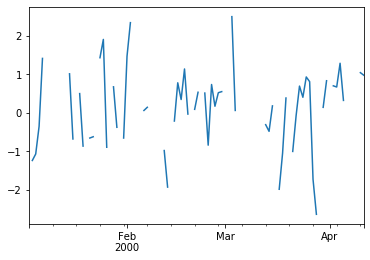

In [378]:
ts2.plot()

In [379]:
ts3 = ts2.interpolate()

ts3

2000-01-03         NaN
2000-01-04   -1.238925
2000-01-05   -1.070042
2000-01-06   -0.352852
2000-01-07    1.411207
                ...   
2000-04-07    1.048490
2000-04-08    1.046107
2000-04-09    1.043723
2000-04-10    1.041339
2000-04-11    0.975218
Freq: D, Length: 100, dtype: float64

In [380]:
ts3.count()

99

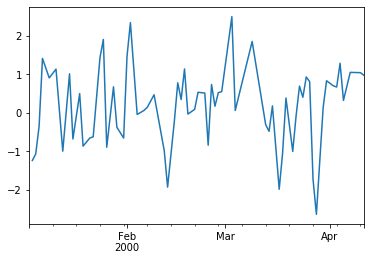

In [381]:
ts3.plot()

O método ``interpolate`` pode ser usado para preencher valores ausentes levando em conta os valores dos índices, especialmente quando esses índices não estão uniformemente distribuídos.


In [382]:
ser = pd.Series([0.0, np.nan, 10], index=[0., 1., 10.])

ser

0.0      0.0
1.0      NaN
10.0    10.0
dtype: float64

In [383]:
ser.interpolate()

0.0      0.0
1.0      5.0
10.0    10.0
dtype: float64

In [384]:
ser.interpolate(
    method='values'
)

0.0      0.0
1.0      1.0
10.0    10.0
dtype: float64

Também é possível interpolar *DataFrames*:

In [385]:
dfi = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
                   'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})

dfi

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [386]:
dfi.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


O argumento `method` flexibiliza `interpolate` para poder usar diferentes métodos de interpolação:

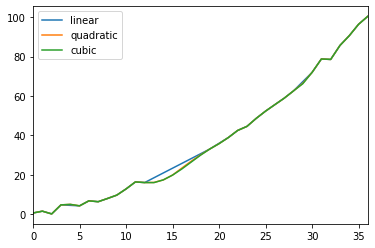

In [387]:
np.random.seed(2)

ser = pd.Series(np.arange(1, 10.1, .25) ** 2 + np.random.randn(37))

missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])

ser[missing] = np.nan

methods = ['linear', 'quadratic', 'cubic']

dfi = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})

dfi.plot()

## Removendo rótulos

Caso a intenção ao usar `reindex` seja apenas remover certos rótulos, o ideal é usar o método `drop`:

In [388]:
df

,one,two,three
a,0.595755,0.205436,NaN
b,0.370960,-1.498786,1.303707
c,-0.621681,1.259842,-0.901544
d,NaN,0.106894,-3.080006


In [389]:
df.drop(['a', 'd'], axis=0)

,one,two,three
b,0.370960,-1.498786,1.303707
c,-0.621681,1.259842,-0.901544


In [390]:
df.reindex(
    df.index.difference(
        ['a', 'd']
    )
)  # o mesmo resultado, mas usando reindex

,one,two,three
b,0.370960,-1.498786,1.303707
c,-0.621681,1.259842,-0.901544


In [391]:
df.drop(['one'], axis=1)

,two,three
a,0.205436,NaN
b,-1.498786,1.303707
c,1.259842,-0.901544
d,0.106894,-3.080006


## Renomeando rótulos

Para renomear índices e colunas, o método ``rename()`` do *pandas* pode ser utilizado. Ele aceita como argumentos um dicionário, uma *Series* ou até mesmo uma função. Quando uma função é passada, ela precisa retornar um valor único e válido para cada rótulo que será renomeado.

In [392]:
s

a    1.398643
b   -0.786223
c   -0.363305
d   -0.546074
e    0.037341
dtype: float64

In [393]:
s.rename(str.upper)

A    1.398643
B   -0.786223
C   -0.363305
D   -0.546074
E    0.037341
dtype: float64

Quando um mapeamento é utilizado para renomear, apenas os rótulos presentes no mapeamento serão alterados. Os rótulos que não estiverem no mapeamento permanecem inalterados. Se o mapeamento contiver rótulos que não existem, esses são simplesmente ignorados, sem gerar erro.

In [396]:
df

,one,two,three
a,0.595755,0.205436,NaN
b,0.370960,-1.498786,1.303707
c,-0.621681,1.259842,-0.901544
d,NaN,0.106894,-3.080006


In [397]:
df.rename(
    columns={'one': 'foo', 'two': 'bar'},
    index={'a': 'apple', 'b': 'banana', 'd': 'durian'}
)

,foo,bar,three
apple,0.595755,0.205436,NaN
banana,0.370960,-1.498786,1.303707
c,-0.621681,1.259842,-0.901544
durian,NaN,0.106894,-3.080006


## Substituindo valores

Muitas vezes, é necessário realizar a substituição de valores em uma *DataFrame* ou *Series*. O método `replace` oferece uma maneira simples e eficaz de fazer isso. Em uma *Series*, é possível substituir tanto um único valor quanto uma lista de valores por novos valores:

In [398]:
ser = pd.Series([0., 1., 2., 3., 4.])

ser.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [399]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

Também é possível especificar um dicionário de substituições:

In [400]:
ser.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
3      3.0
4      4.0
dtype: float64

Para `DataFrames`, é possível determinar substituições por coluna:

In [401]:
df = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})

df.replace({'a': 0, 'b': 5}, 100)

,a,b
0,100,100
1,1,6
2,2,7
3,3,8
4,4,9


In [403]:
df.replace({'a': [0, 2], 'b': 5}, 100)

,a,b
0,100,100
1,1,6
2,100,7
3,3,8
4,4,9


Em vez de substituir por valores específicos, é possível tratar determinados valores como faltantes e, então, preenchê-los ou interpolá-los:

In [405]:
ser

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [407]:
ser.replace([2, 3], method='ffill')

0    0.0
1    1.0
2    1.0
3    1.0
4    4.0
dtype: float64

## Aplicando funções

Funções arbitrárias podem ser aplicadas a um eixo de uma `DataFrame` usando o método `apply()`, que recebe um argumento opcional de eixo (`axis`).

In [417]:
df = pd.DataFrame({
    'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
    'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])
})

df

,one,two,three
a,0.047971,1.000366,NaN
b,-0.829135,-0.381093,0.433496
c,0.087710,-0.375669,1.278379
d,NaN,-0.074471,-0.634679


In [418]:
df.apply(np.mean)

one     -0.231151
two      0.042283
three    0.359065
dtype: float64

In [423]:
df.mean()  # equivalente ao resultado acima

one     -0.231151
two      0.042283
three    0.359065
dtype: float64

In [419]:
df.apply(np.mean, axis=1)

a    0.524168
b   -0.258910
c    0.330140
d   -0.354575
dtype: float64

In [424]:
df.mean(axis=1)  # equivalente ao resultado acima

a    0.524168
b   -0.258910
c    0.330140
d   -0.354575
dtype: float64

In [421]:
df.apply(lambda x: x.max() - x.min())

one      0.916846
two      1.381458
three    1.913059
dtype: float64

In [422]:
df.apply(np.exp)

,one,two,three
a,1.049140,2.719277,NaN
b,0.436427,0.683115,1.542642
c,1.091672,0.686829,3.590815
d,NaN,0.928235,0.530105


O retorno da função fornecida ao método `apply()` afeta diretamente o tipo do resultado. Se a função retornar uma *Series*, a saída será uma *DataFrame*; se retornar um valor único, o resultado será uma *Series*. O `apply()` pode ser bastante útil para análises mais complexas, como por exemplo, identificar a data em que o valor mínimo ocorreu para cada coluna, conforme mostrado no exemplo abaixo:

In [425]:
tsdf = pd.DataFrame(
    np.random.randn(1000, 3), 
    columns=['A', 'B', 'C'],
    index=pd.date_range('1/1/2000', 
                        periods=1000)
)


tsdf.apply(lambda x: x.idxmax())

A   2000-02-07
B   2001-02-22
C   2000-10-22
dtype: datetime64[ns]

Também pode ser útil passar argumentos posicionais ou nomeados para o método `apply`. Exemplo:

In [426]:
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide

In [427]:
df.apply(subtract_and_divide, args=(5,), divide=3)

,one,two,three
a,-1.650676,-1.333211,NaN
b,-1.943045,-1.793698,-1.522168
c,-1.637430,-1.791890,-1.240540
d,NaN,-1.691490,-1.878226


Por fim, o método `apply()` possui o argumento `raw`, que, por padrão, é definido como `False`. Quando configurado para `True`, ele converte cada linha ou coluna para um objeto *array* do *NumPy* antes de aplicar a função, o que pode melhorar a performance em casos onde a indexação não é necessária.